#Qestion 2
##Part 1
The activation function for the output layer is **Identity Function**. The reason is that our output is of a regression problem. For regression problems, this function is used.

##Part 2
Only **One** neuron exists in the output layer. 

Why? The reason is that our output is one dimentional. In other words, by feeding our input to the neural network, only a number is the outcome, known as our output - y.

##Part 3
Report the average MSE loss and the accuracy:
- This part refers to the Trained Neural Network behavior

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Function
def sigmoid(z):
	return 1/(1 + np.exp(-z))
 
#DATASETS - input files
X_train = np.loadtxt("X_train.csv")
X_test=np.loadtxt("X_test.csv")
Y_train = np.loadtxt("Y_train.csv")
Y_test = np.loadtxt("Y_test.csv")
x=X_train.T
X_test=X_test.T
y=Y_train

#Constants
nodes=5 #Number of Neurons in the hidden layer
iter=10000 #Number of iterations
LR=0.001 #Learning Rate

#INITIAL Values - RANDOM
W1 = np.random.rand(nodes,2)
b1 = np.random.rand(nodes,1)
W2 = np.random.rand(1,nodes)
b2 = np.random.rand(1,1)

LLoss=[]
acl=[]
acclist=[]
# Iteration
for i in range (iter):
  z1 = np.dot(W1, x)+b1
  a1 = sigmoid(z1)
  z2 = np.dot(W2, a1) + b2
  a2 = (z2)

  #Derivatives
  dLdz2 = (a2 - y) # i.e. dL/dz2 
  dLdW2 = np.dot(dLdz2, a1.T)
  dLdb2 = dLdz2
  dLdz1 = np.dot(W2.T, dLdz2) * sigmoid(z1) * (1-sigmoid(z1))
  dLdW1 = np.dot(dLdz1, x.T)
  dLdb1 = dLdz1 #i.e. dL/db1

  #Updating
  W1 = W1 - LR*dLdW1
  W2 = W2 - LR*dLdW2
  b1 = b1 - LR*dLdb1
  b2 = b2 - LR*dLdb2

  #LOSS MSE
  Loss = np.square(np.subtract(y,a2)).mean()
  LLoss.append(Loss)

  #ACCURACY
  accrc=1-abs((a2.mean()-y.mean())/(a2.mean()))	#1 means the best perfect match!!!
  acclist.append(accrc)


accuracy=1-abs((a2-y)/(a2))	#1 means the best perfect match!!!
count01 = 0
count001=0
for i in accuracy[0]:
  if i >= 0.99:
    count01 = count01 + 1
  if i >= 0.999:
    count001 = count001 + 1
  #PRINT #Features of the NN for now: nodes=5 iter=10000 LR=0.001 
print('\033[1m----This neural network has 5 nodes for now!----\n')
print('The average MSE loss equals to:',Loss,'\n')
print("This neural network's accuracy is (",count01/len(y),') when 0.01 error is acceptable!')
print("This neural network's accuracy is (",count001/len(y),') when 0.001 error is acceptable!')

----This neural network has 5 nodes for now!----

The average MSE loss equals to: 0.008697605672474287 

This neural network's accuracy is ( 0.99 ) when 0.01 error is acceptable!
This neural network's accuracy is ( 0.85 ) when 0.001 error is acceptable!


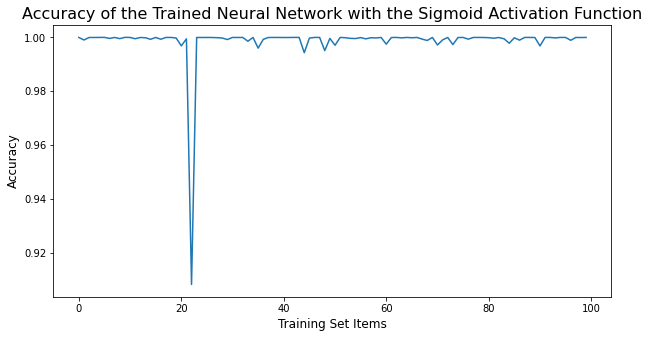


----Where "Accuracy=1" refers to the best perfect match!----



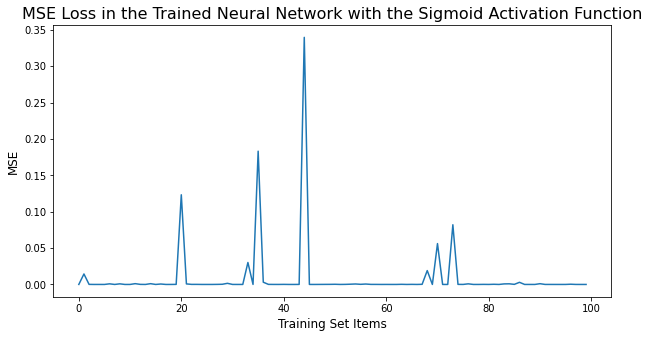

In [80]:
# PLOTIING - LOSS & Accuracy in the Trained NN
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(range(100), accuracy[0])
plt.title('Accuracy of the Trained Neural Network with the Sigmoid Activation Function', fontsize=16)
plt.xlabel('Training Set Items', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

print('\033[1m\n----Where "Accuracy=1" refers to the best perfect match!----\n')

precl=[]
accl=[]
j=0
for idx , itm in enumerate (y):
  precision =(a2[0][idx]-itm)**2
  precl.append(precision)
  if precision<0.001:
    j=j+1 
accuracy=j/len(y)*100
plt.figure(figsize=(10,5))
plt.plot(range(100), precl)
plt.title('MSE Loss in the Trained Neural Network with the Sigmoid Activation Function', fontsize=16)
plt.xlabel('Training Set Items', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()


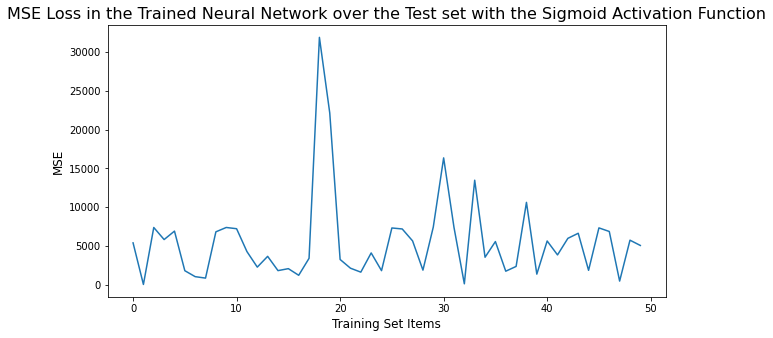

In [81]:
#---Testing Performance of the Test Set---
#Constants
nodes=5 #Number of Neurons in the hidden layer
iter=10000 #Number of iterations
LR=0.001 #Learning Rate

z1 = np.dot(W1,X_test) 
a1 = sigmoid(z1)
z2 = np.dot(W2, a1) 
a2 = (z2)

# Compute Loss
Loss=(((a2 - Y_test)**2).sum())**0.5 / (2*a2.size)

accl=[]
for idx , itm in enumerate (Y_test):
  acc =1-abs((a2[0][idx]-itm)/(itm))
  accl.append(acc)

# PLOTIING - LOSS in the Trained NN
precl=[]
accl=[]
j=0
for idx , itm in enumerate (Y_test):
  precision =(a2[0][idx]-itm)**2
  precl.append(precision)
  if precision<0.001:
    j=j+1 
accuracy=j/len(Y_test)*100
plt.figure(figsize=(10,5))
plt.plot(range(50), precl)
plt.title('MSE Loss in the Trained Neural Network over the Test set with the Sigmoid Activation Function', fontsize=16)
plt.xlabel('Training Set Items', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()





##Part 4
Plot the loss and accuracy as a function of the number of iterations.

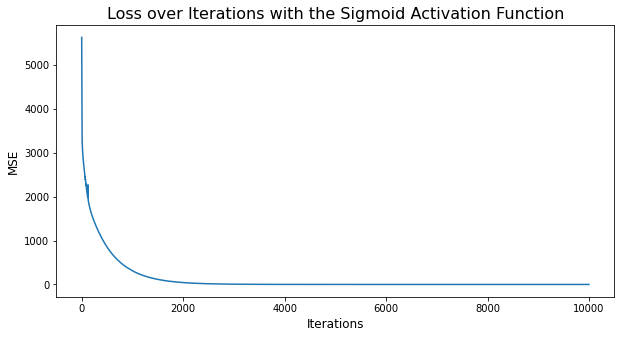

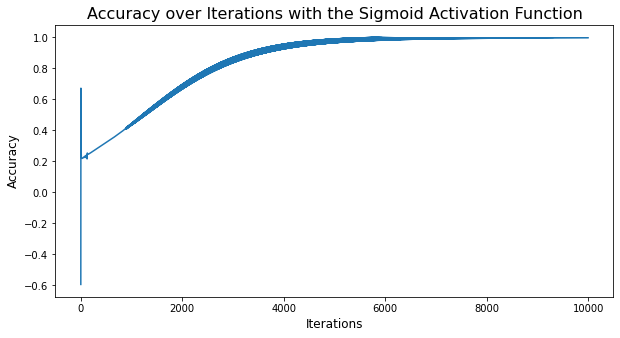

In [82]:
#Plot over Iterations
plt.figure(figsize=(10,5))
plt.plot(range(iter), LLoss)
plt.title('Loss over Iterations with the Sigmoid Activation Function', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(iter), acclist)
plt.title('Accuracy over Iterations with the Sigmoid Activation Function', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

##Part 5
The effect of the learning rate on the training process: 0.001<LR<1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in square


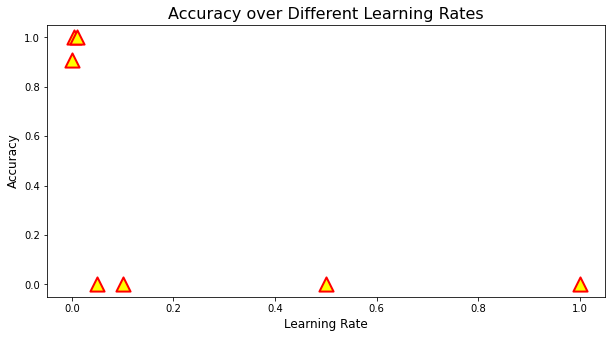

In [83]:
#DATASETS - input files
X_train = np.loadtxt("X_train.csv")
X_test=np.loadtxt("X_test.csv")
Y_train = np.loadtxt("Y_train.csv")
Y_test = np.loadtxt("Y_test.csv")
x=X_train.T
X_test=X_test.T
y=Y_train

#Constants
nodes=5 #Number of Neurons in the hidden layer
iter=10000 #Number of iterations
LR=[0.001,0.005,0.01,0.05,0.1,0.5,1] #Learning Rate
accuracy_over_LR=[]
for jj in LR:

  #INITIAL Values - RANDOM
  W1 = np.random.rand(nodes,2)
  b1 = np.random.rand(nodes,1)
  W2 = np.random.rand(1,nodes)
  b2 = np.random.rand(1,1)

  LLoss=[]
  acl=[]
  acclist=[]
  # Iteration
  for i in range (iter):
    z1 = np.dot(W1, x)+b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = (z2)

    #Derivatives
    dLdz2 = (a2 - y) # i.e. dL/dz2 
    dLdW2 = np.dot(dLdz2, a1.T)
    dLdb2 = dLdz2
    dLdz1 = np.dot(W2.T, dLdz2) * sigmoid(z1) * (1-sigmoid(z1))
    dLdW1 = np.dot(dLdz1, x.T)
    dLdb1 = dLdz1 #i.e. dL/db1

    #Updating
    W1 = W1 - jj*dLdW1
    W2 = W2 - jj*dLdW2
    b1 = b1 - jj*dLdb1
    b2 = b2 - jj*dLdb2

    #LOSS MSE
    
    Loss = np.square(np.subtract(y,a2)).mean()
    LLoss.append(Loss)
    #ACCURACY
    accrc=1-abs((a2.mean()-y.mean())/(a2.mean()))	#1 means the best perfect match!!!
    acclist.append(accrc)


  accuracy=1-abs((a2-y)/(a2))	#1 means the best perfect match!!!
  count = 0
  for i in accuracy[0]:
    if i >= 0.999:
      count = count + 1
  accuracy_over_LR.append(count/len(y))

#Plot
plt.figure(figsize=(10,5))
plt.scatter(LR, accuracy_over_LR, c ="yellow",
            linewidths = 2,
            marker ="^",
            edgecolor ="red",
            s = 200)
plt.title('Accuracy over Different Learning Rates', fontsize=16)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

- **Learning rate has somehow a binary effect on the accuracy based on my chosen constants. The chosen Learning Rates were:**

**LR=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]. 
However, the behavior of the Accuracy was binary. In other words, among the 7 learning rates I have chosen, 3 of them were so perfect even with 0.999 percision, while 4 of them were not able to predic correctly even with 0.5 percision.**

- **Additionally, by increasing the Learning Rate, Accuracy falls down as expected.**

## Part 6
The effect of the number of neurons in the hidden layer:


- a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not?

**No, there is no need to change the update rule.**

**Why? since nothing in the relations will change by changing the number of neurons. The number of neurons and the arrays related to them with be cancelled by the other related arrays, so there is no need to worry about them.** 

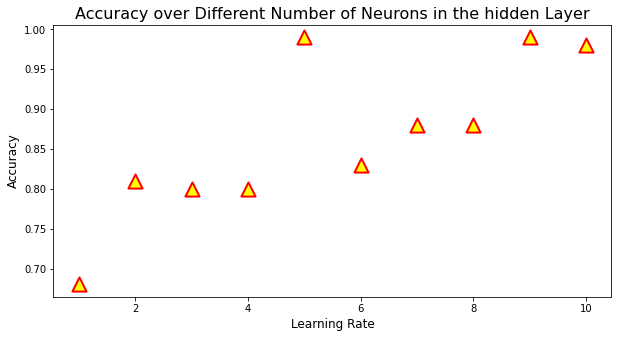


----As shown in the above figure, generally, the more nodes in the hidden layer the more accurate our Neural Networ!
 However, after a threshold, the more neurons result in OVERFITTING. As a result, the accuracy falls down then.----



In [84]:
#DATASETS - input files
X_train = np.loadtxt("X_train.csv")
X_test=np.loadtxt("X_test.csv")
Y_train = np.loadtxt("Y_train.csv")
Y_test = np.loadtxt("Y_test.csv")
x=X_train.T
X_test=X_test.T
y=Y_train

#Constants
nodes=[*range(1, 11, 1)] #Number of Neurons in the hidden layer [1:10]
iter=10000 #Number of iterations
LR=0.001
accuracy_over_nodes=[]
Loss_over_nodes=[]

for k in nodes:
#INITIAL Values - RANDOM
  W1 = np.random.rand(k,2)
  b1 = np.random.rand(k,1)
  W2 = np.random.rand(1,k)
  b2 = np.random.rand(1,1)

  LLoss=[]
  acl=[]
  acclist=[]
  # Iteration
  for i in range (iter):
    z1 = np.dot(W1, x)+b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = (z2)

    #Derivatives
    dLdz2 = (a2 - y) # i.e. dL/dz2 
    dLdW2 = np.dot(dLdz2, a1.T)
    dLdb2 = dLdz2
    dLdz1 = np.dot(W2.T, dLdz2) * sigmoid(z1) * (1-sigmoid(z1))
    dLdW1 = np.dot(dLdz1, x.T)
    dLdb1 = dLdz1 #i.e. dL/db1

    #Updating
    W1 = W1 - LR*dLdW1
    W2 = W2 - LR*dLdW2
    b1 = b1 - LR*dLdb1
    b2 = b2 - LR*dLdb2

    #LOSS MSE
    Loss = np.square(np.subtract(y,a2)).mean()
    LLoss.append(Loss)
    #ACCURACY
    accrc=1-abs((a2.mean()-y.mean())/(a2.mean()))	#1 means the best perfect match!!!
    acclist.append(accrc)


  accuracy=1-abs((a2-y)/(a2))	#1 means the best perfect match!!!
  count = 0
  for i in accuracy[0]:
    if i >= 0.999:
      count = count + 1
  accuracy_over_nodes.append(count/len(y))
  Loss_over_nodes.append(Loss)

#Plot
plt.figure(figsize=(10,5))
plt.scatter(nodes, accuracy_over_nodes, c ="yellow",
            linewidths = 2,
            marker ="^",
            edgecolor ="red",
            s = 200)
plt.title('Accuracy over Different Number of Neurons in the hidden Layer', fontsize=16)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

print('\033[1m\n----As shown in the above figure, generally, the more nodes in the hidden layer the more accurate our Neural Networ!\n However, after a threshold, the more neurons result in OVERFITTING. As a result, the accuracy falls down then.----\n')

- b. Report your observations by reporting the final loss and plotting the true labels and
your predicted labels, along with a brief (2-3 lines) description.


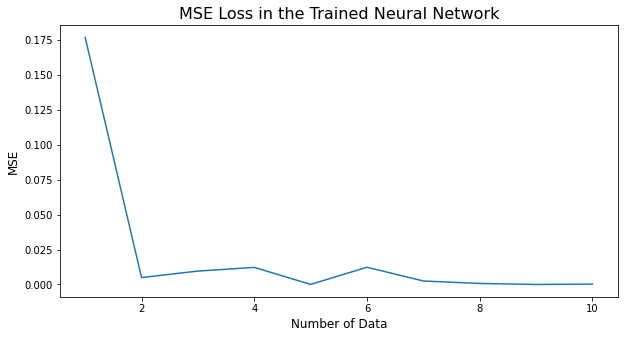

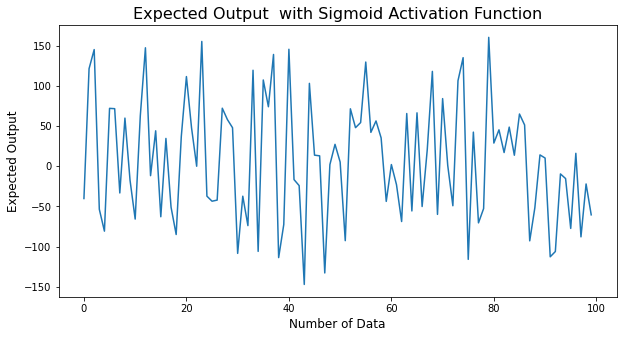

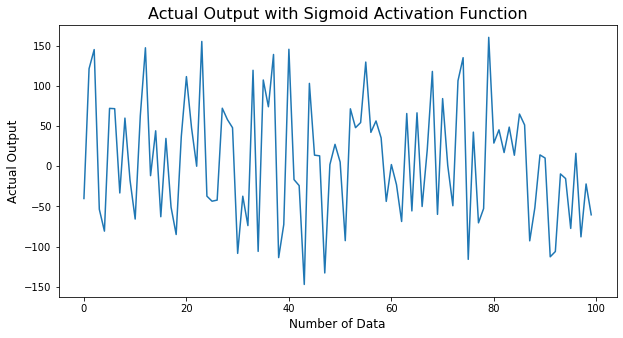

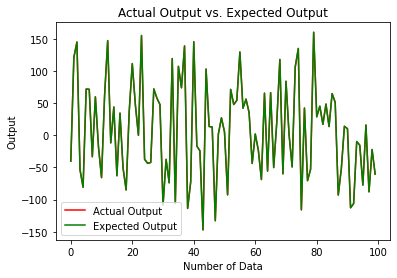

In [85]:
plt.figure(figsize=(10,5))
plt.plot(nodes, Loss_over_nodes)
plt.title('MSE Loss in the Trained Neural Network', fontsize=16)
plt.xlabel('Number of Data', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()


a2=a2.reshape((len(a2[0])))
plt.figure(figsize=(10,5))
plt.plot(range(len(y)), a2)
plt.title('Expected Output  with Sigmoid Activation Function', fontsize=16)
plt.xlabel('Number of Data', fontsize=12)
plt.ylabel('Expected Output', fontsize=12)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(len(y)), y)
plt.title('Actual Output with Sigmoid Activation Function', fontsize=16)
plt.xlabel('Number of Data', fontsize=12)
plt.ylabel('Actual Output', fontsize=12)
plt.show()


XX =range(len(y))  
plt.plot(XX,y, color='r', label='Actual Output')
plt.plot(XX,a2, color='g', label='Expected Output')
plt.xlabel("Number of Data")
plt.ylabel("Output")
plt.title("Actual Output vs. Expected Output")
plt.legend()
plt.show()

**As clear, these two - the expected and the actual output - are perfectly match to each other, to an extent that I was wasting some time realizng why the plot is drawing only one of them! :)**

**As shown in the above figure, generally, the more nodes in the hidden layer the more accurate our Neural Networ! However, after a threshold, the more neurons result in OVERFITTING. As a result, the accuracy falls down then.**

## Part 7
The effect of the activation functions on the network:

- **Tanh Activation Function**
if g(z)=tanh(z); then dg/dz=1-g^2=1-(tanh(z)**2)

----This neural network has 5 nodes for now!----

The average MSE loss equals to: 0.07670291074815375 

This neural network's accuracy is ( 0.83 ) when 0.01 error is acceptable!
This neural network's accuracy is ( 0.49 ) when 0.001 error is acceptable!




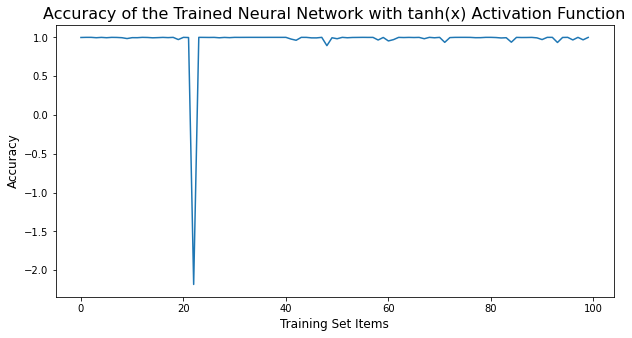


----Where "Accuracy=1" refers to the best perfect match!----



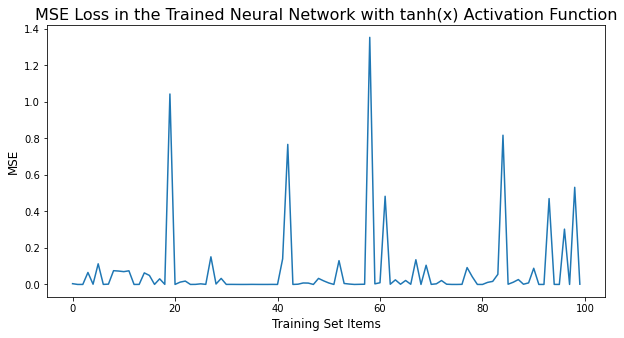

In [86]:
# Activation Function Tanh(x)
def tanh(z):
	return ((np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)))
 
#DATASETS - input files
X_train = np.loadtxt("X_train.csv")
X_test=np.loadtxt("X_test.csv")
Y_train = np.loadtxt("Y_train.csv")
Y_test = np.loadtxt("Y_test.csv")
x=X_train.T
X_test=X_test.T
y=Y_train

#Constants
nodes=5 #Number of Neurons in the hidden layer
iter=10000 #Number of iterations
LR=0.001 #Learning Rate

#INITIAL Values - RANDOM
W1 = np.random.rand(nodes,2)
b1 = np.random.rand(nodes,1)
W2 = np.random.rand(1,nodes)
b2 = np.random.rand(1,1)

LLoss=[]
acl=[]
acclist=[]
# Iteration
for i in range (iter):
  z1 = np.dot(W1, x)+b1
  a1 = tanh(z1)
  z2 = np.dot(W2, a1) + b2
  a2 = (z2)

  #Derivatives
  dLdz2 = (a2 - y) # i.e. dL/dz2 
  dLdW2 = np.dot(dLdz2, a1.T)
  dLdb2 = dLdz2
  dLdz1 = np.dot(W2.T, dLdz2) * (1-tanh(z1)**2)
  dLdW1 = np.dot(dLdz1, x.T)
  dLdb1 = dLdz1 #i.e. dL/db1

  #Updating
  W1 = W1 - LR*dLdW1
  W2 = W2 - LR*dLdW2
  b1 = b1 - LR*dLdb1
  b2 = b2 - LR*dLdb2

  #LOSS MSE
  Loss = np.square(np.subtract(y,a2)).mean()
  LLoss.append(Loss)

  #ACCURACY
  accrc=1-abs((a2.mean()-y.mean())/(a2.mean()))	#1 means the best perfect match!!!
  acclist.append(accrc)


accuracy=1-abs((a2-y)/(a2))	#1 means the best perfect match!!!
count01 = 0
count001=0
for i in accuracy[0]:
  if i >= 0.99:
    count01 = count01 + 1
  if i >= 0.999:
    count001 = count001 + 1
  #PRINT #Features of the NN for now: nodes=5 iter=10000 LR=0.001 
print('\033[1m----This neural network has 5 nodes for now!----\n')
print('The average MSE loss equals to:',Loss,'\n')
print("This neural network's accuracy is (",count01/len(y),') when 0.01 error is acceptable!')
print("This neural network's accuracy is (",count001/len(y),') when 0.001 error is acceptable!\n\n')

# PLOTIING - LOSS & Accuracy in the Trained NN
plt.figure(figsize=(10,5))
plt.plot(range(100), accuracy[0])
plt.title('Accuracy of the Trained Neural Network with tanh(x) Activation Function', fontsize=16)
plt.xlabel('Training Set Items', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

print('\033[1m\n----Where "Accuracy=1" refers to the best perfect match!----\n')

precl=[]
accl=[]
j=0
for idx , itm in enumerate (y):
  precision =(a2[0][idx]-itm)**2
  precl.append(precision)
  if precision<0.001:
    j=j+1 
accuracy=j/len(y)*100
plt.figure(figsize=(10,5))
plt.plot(range(100), precl)
plt.title('MSE Loss in the Trained Neural Network with tanh(x) Activation Function', fontsize=16)
plt.xlabel('Training Set Items', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()


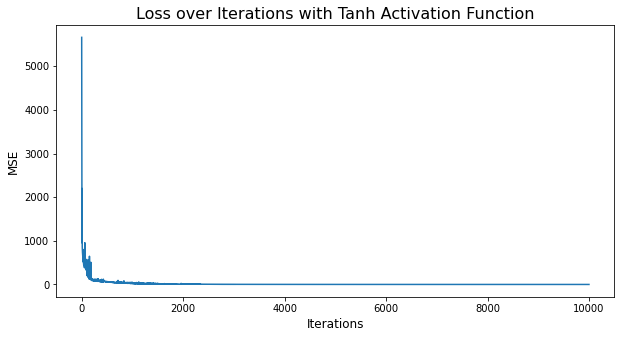

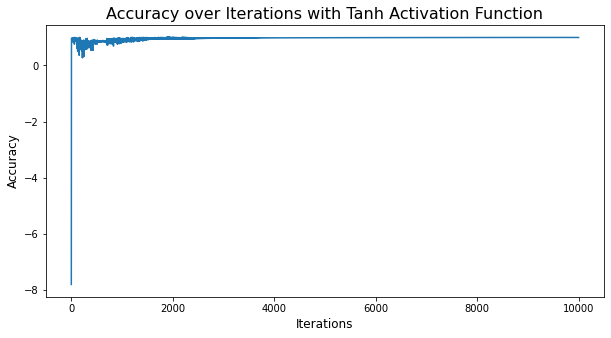

In [87]:
#Plot over Iterations
plt.figure(figsize=(10,5))
plt.plot(range(iter), LLoss)
plt.title('Loss over Iterations with Tanh Activation Function', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(iter), acclist)
plt.title('Accuracy over Iterations with Tanh Activation Function', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

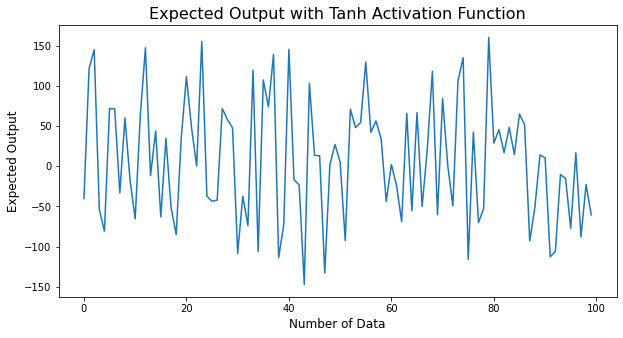

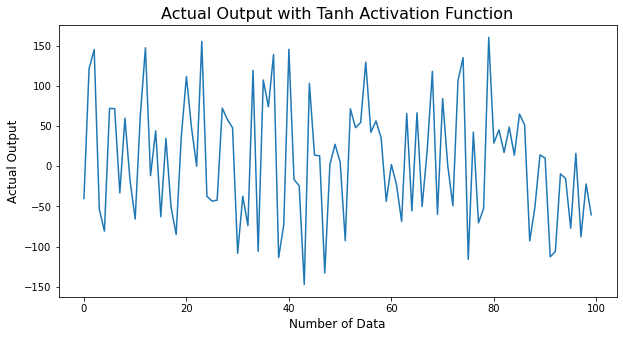

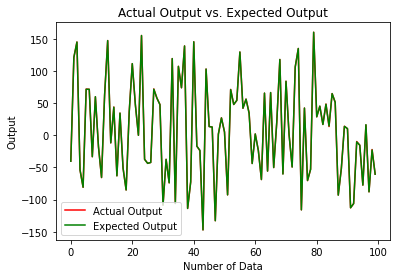

In [88]:

a2=a2.reshape((len(a2[0])))
plt.figure(figsize=(10,5))
# plt.plot(range(len(y)), y)
plt.plot(range(len(y)), a2)
plt.title('Expected Output with Tanh Activation Function', fontsize=16)
plt.xlabel('Number of Data', fontsize=12)
plt.ylabel('Expected Output', fontsize=12)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(len(y)), y)
plt.title('Actual Output with Tanh Activation Function', fontsize=16)
plt.xlabel('Number of Data', fontsize=12)
plt.ylabel('Actual Output', fontsize=12)
plt.show()


XX =range(len(y))  
plt.plot(XX,y, color='r', label='Actual Output')
plt.plot(XX,a2, color='g', label='Expected Output')
plt.xlabel("Number of Data")
plt.ylabel("Output")
plt.title("Actual Output vs. Expected Output")
plt.legend()
plt.show()

- **Linear Activation Function**
if g(z)=z; then dg/dz=1

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


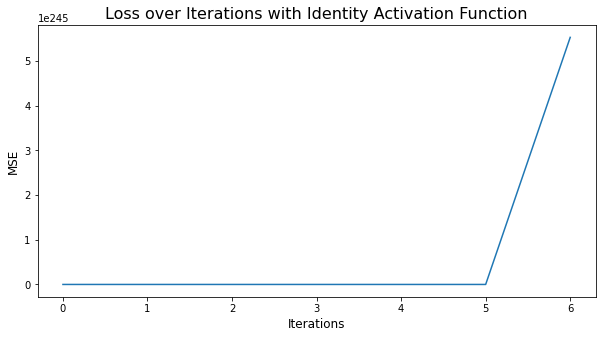

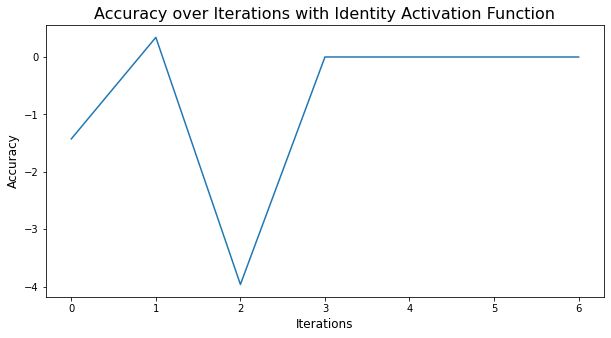

In [89]:
# Activation Function Linear(x)

#DATASETS - input files
X_train = np.loadtxt("X_train.csv")
X_test=np.loadtxt("X_test.csv")
Y_train = np.loadtxt("Y_train.csv")
Y_test = np.loadtxt("Y_test.csv")
x=X_train.T
X_test=X_test.T
y=Y_train

#Constants
nodes=5 #Number of Neurons in the hidden layer
iter=10000 #Number of iterations
LR=0.001 #Learning Rate

#INITIAL Values - RANDOM
W1 = np.random.rand(nodes,2)
b1 = np.random.rand(nodes,1)
W2 = np.random.rand(1,nodes)
b2 = np.random.rand(1,1)

LLoss=[]
acl=[]
acclist=[]
# Iteration
for i in range (iter):
  z1 = np.dot(W1, x)+b1
  a1 = (z1)
  z2 = np.dot(W2, a1) + b2
  a2 = (z2)

  #Derivatives
  dLdz2 = (a2 - y) # i.e. dL/dz2 
  dLdW2 = np.dot(dLdz2, a1.T)
  dLdb2 = dLdz2
  dLdz1 = np.dot(W2.T, dLdz2) * (1)
  dLdW1 = np.dot(dLdz1, x.T)
  dLdb1 = dLdz1 #i.e. dL/db1

  #Updating
  W1 = W1 - LR*dLdW1
  W2 = W2 - LR*dLdW2
  b1 = b1 - LR*dLdb1
  b2 = b2 - LR*dLdb2

  #LOSS MSE
  Loss = np.square(np.subtract(y,a2)).mean()
  LLoss.append(Loss)

  #ACCURACY
  accrc=1-abs((a2.mean()-y.mean())/(a2.mean()))	#1 means the best perfect match!!!
  acclist.append(accrc)


accuracy=1-abs((a2-y)/(a2))	#1 means the best perfect match!!!
count01 = 0
count001=0
for i in accuracy[0]:
  if i >= 0.99:
    count01 = count01 + 1
  if i >= 0.999:
    count001 = count001 + 1

#Plot over Iterations
plt.figure(figsize=(10,5))
plt.plot(range(iter), LLoss)
plt.title('Loss over Iterations with Identity Activation Function', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(iter), acclist)
plt.title('Accuracy over Iterations with Identity Activation Function', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

- **ReLU Activation Function**
if g(z)=ReLU(z)=max(0,z); then dg/dz=0 where x<0 and dg/dz=1 where x>0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars


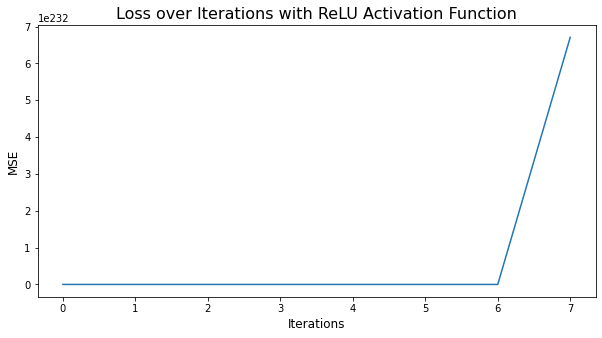

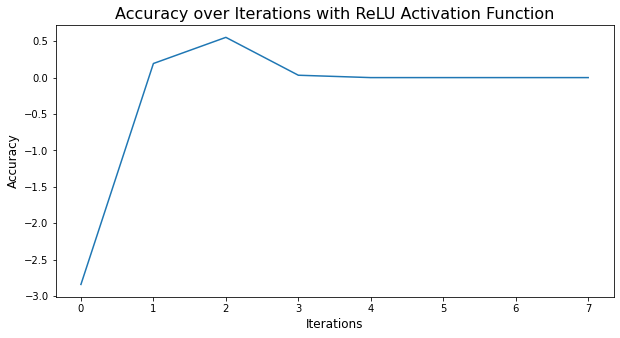

In [90]:
# Activation Function ReLU(x)
def relu(z):
  a1=np.zeros((nodes,len(x[0])))
  for idx, itm in enumerate (z):
    for tt in range(len(z[0])):
      #print(idx,itm,tt)
      if (z[idx][tt]<0):
        a1[idx][tt]=0
      else:
        a1[idx][tt]=z[idx][tt]
  return(a1)

def relup(z): #relu_prime (derivative)
  der=np.zeros((nodes,len(x[0])))
  for idx, itm in enumerate (z):
    for tt in range(len(z[0])):
      #print(idx,itm,tt)
      if (z[idx][tt]<0):
        der[idx][tt]=0
      else:
        der[idx][tt]=1
  return(der)
 
#DATASETS - input files
X_train = np.loadtxt("X_train.csv")
X_test=np.loadtxt("X_test.csv")
Y_train = np.loadtxt("Y_train.csv")
Y_test = np.loadtxt("Y_test.csv")
x=X_train.T
X_test=X_test.T
y=Y_train

#Constants
nodes=5 #Number of Neurons in the hidden layer
iter=1000 #Number of iterations
LR=0.001 #Learning Rate

#INITIAL Values - RANDOM
W1 = np.random.rand(nodes,2)
b1 = np.random.rand(nodes,1)
W2 = np.random.rand(1,nodes)
b2 = np.random.rand(1,1)

LLoss=[]
acl=[]
acclist=[]
# Iteration
for i in range (iter):
  z1 = np.dot(W1, x)+b1
  a1=relu(z1)
  z2 = np.dot(W2, a1) + b2
  a2 = (z2)

  #Derivatives
  dLdz2 = (a2 - y) # i.e. dL/dz2 
  dLdW2 = np.dot(dLdz2, a1.T)
  dLdb2 = dLdz2
  dLdz1 = np.dot(W2.T, dLdz2) * (relup(z1))
  dLdW1 = np.dot(dLdz1, x.T)
  dLdb1 = dLdz1 #i.e. dL/db1

  #Updating
  W1 = W1 - LR*dLdW1
  W2 = W2 - LR*dLdW2
  b1 = b1 - LR*dLdb1
  b2 = b2 - LR*dLdb2

  #LOSS MSE
  Loss = np.square(np.subtract(y,a2)).mean()
  LLoss.append(Loss)

  #ACCURACY
  accrc=1-abs((a2.mean()-y.mean())/(a2.mean()))	#1 means the best perfect match!!!
  acclist.append(accrc)


accuracy=1-abs((a2-y)/(a2))	#1 means the best perfect match!!!
count01 = 0
count001=0
for i in accuracy[0]:
  if i >= 0.99:
    count01 = count01 + 1
  if i >= 0.999:
    count001 = count001 + 1

#Plot over Iterations
plt.figure(figsize=(10,5))
plt.plot(range(iter), LLoss)
plt.title('Loss over Iterations with ReLU Activation Function', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(iter), acclist)
plt.title('Accuracy over Iterations with ReLU Activation Function', fontsize=16)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

- a. Will you need to change the update rule?

**Yes, but not too much effort is needed! By this I mean, only the derivative term of the activaiton function and the function itself need to be change. Other terms remain the same as before!**

- b. What is the change that you need to make to achieve this experiment?

**As mentioned above, I needed to change the derivative term of the activaiton function and the function itself. Other terms remained the same as before!**

c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

**Four activation function were chosen: Sigmoid, Tanh, Linear (Identity), and ReLU. Overall, the ReLU activation function had the worst performance given my chosen constants (number of neurons in the hidden layer and the learning rate).
The Sigmoid had the better performance than the Tanh and Identity function given my chosen constants:**

**For Tanh Activaiton Function: 
The average MSE loss equals to: 0.3592562588554012 
This neural network's accuracy is ( 0.68 ) when 0.01 error is acceptable!
This neural network's accuracy is ( 0.4 ) when 0.001 error is acceptable!**

**While, for Sigmoid Activation Function:
The average MSE loss equals to: 0.0013454072459594321 
This neural network's accuracy is ( 0.99 ) when 0.01 error is acceptable!
This neural network's accuracy is ( 0.89 ) when 0.001 error is acceptable!**

**However, I noticed that the solution converged earliear by the Tanh activation function than the Sigmoid.**